In [1]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2025-09-05 08:38:19.340166: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-05 08:38:19.791271: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757040799.962535   11473 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757040800.013858   11473 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-05 08:38:20.437012: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# CNN in MNIST Data

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

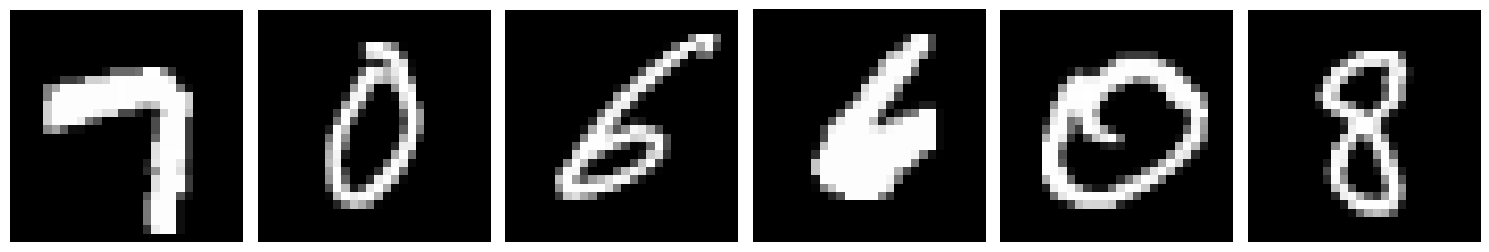

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Select 6 images (you can choose specific indices if needed)
indices = np.random.choice(len(X_train), 6, replace=False)
selected_images = [X_train[i] for i in indices]

# Create subplots
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Plot each image
for ax, img in zip(axes, selected_images):
    ax.imshow(img, cmap='gray')  # Display image in grayscale
    ax.axis('off')  # Turn off axes for a cleaner look

# Display the plot
plt.tight_layout()
plt.show()

In [5]:
# Data Preprocessing
X_train = X_train.reshape(*X_train.shape,1)
X_test = X_test.reshape(*X_test.shape,1)

X_train = X_train / 255
X_test = X_test / 255

## Model Defination

In [6]:
input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

In [29]:
model = Sequential()

model.add(Input(shape= input_shape))

model.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,832 (132.16 KB)

 Trainable params: 33,832 (132.16 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2
)

Epoch 1/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7807 - loss: 0.6923 - val_accuracy: 0.9699 - val_loss: 0.0984
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9657 - loss: 0.1117 - val_accuracy: 0.9794 - val_loss: 0.0680
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9752 - loss: 0.0763 - val_accuracy: 0.9815 - val_loss: 0.0630
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9815 - loss: 0.0597 - val_accuracy: 0.9864 - val_loss: 0.0462
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9854 - loss: 0.0480 - val_accuracy: 0.9860 - val_loss: 0.0477
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.9869 - loss: 0.0411 - val_accuracy: 0.9878 - val_loss: 0.0484
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9878 - loss: 0.0400 - val_accuracy: 0.9873 - val_loss: 0.0428
Epoch 8/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9886 - loss: 0.0357 - val_accuracy: 

In [33]:
import pandas as pd
df = pd.DataFrame(history.history)

<Axes: >

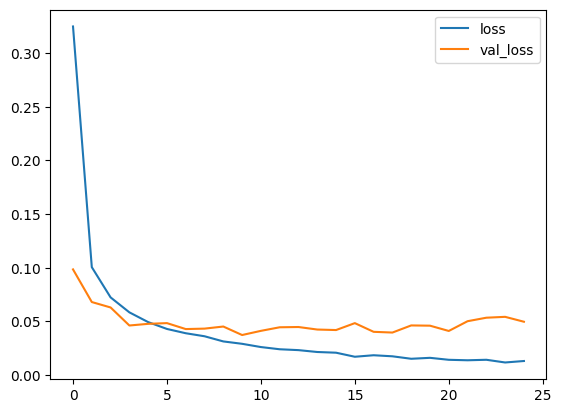

In [34]:
df[['loss', 'val_loss']].plot.line()

In [35]:
pred = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test, pred)

array([[ 973,    0,    2,    0,    0,    0,    1,    2,    1,    1],
       [   0, 1131,    2,    0,    0,    0,    0,    2,    0,    0],
       [   0,    0, 1029,    0,    0,    0,    0,    2,    0,    1],
       [   1,    1,    6,  987,    0,    7,    0,    2,    1,    5],
       [   0,    0,    1,    0,  976,    0,    0,    1,    0,    4],
       [   1,    0,    0,    6,    0,  877,    2,    1,    1,    4],
       [   4,    3,    0,    0,    2,    2,  946,    0,    1,    0],
       [   0,    5,    4,    0,    1,    0,    0, 1015,    1,    2],
       [   2,    2,    0,    3,    0,    1,    0,    1,  960,    5],
       [   1,    0,    0,    0,    5,    3,    0,    4,    3,  993]])